In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import os, glob 
import pandas as pd
import numpy as np

In [2]:
path = "C:/Proyectos/2024/Conejos/mapas"

os.chdir(path)
print ("Ruta de trabajo:   " + path)

Ruta de trabajo:   C:/Proyectos/2024/Conejos/mapas


In [10]:
# Leer CSV
df = pd.read_csv("pozos.csv")
print ("Ya")

Ya


In [11]:
df

,clv,tipo,uso,regimen,x_nad27,y_nad27,z_gps,z_carta,brocal,2005,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,CM-001,Pozo,1,1,347399,3516542,1248,1273.0,65.0,48.12,...,49.12,0,0,51.28,NaN,NaN,51.25,52.14,52.87,53.25
1,CM-001B,Pozo,1,1,347130,3517209,1258,1271.0,37.0,52.40,...,54.12,0,0,56.3,NaN,NaN,56.24,56.87,57.2,52.24
2,CM-002,Pozo,1,3,347668,3515888,1254,1274.0,NaN,54.65,...,57.57,0,0,59.35,NaN,NaN,60.24,60.87,61.21,61.28
3,CM-003,Pozo,2,3,342798,3490331,1283,1252.0,35.0,68.54,...,72.19,0,73.29,74.25,NaN,NaN,74.8,74.6,74.98,74.12
4,CM-006,Pozo,3,3,351797,3498719,1307,1299.0,51.0,129.15,...,132.2,133.18,133.98,134.58,NaN,NaN,134.89,134.98,135.68,136.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,CM-166,Pozo,8,1,327801,3508308,1255,1255.0,64.0,89.09,...,90.37,94.9,0,95.05,NaN,NaN,96.35,96.94,0,97.05
153,CM-167,Pozo,8,1,330958,3508631,1259,1259.0,73.0,36.54,...,0,0,0,39.97,NaN,NaN,40.14,40.16,40.87,40.9
154,CM-168,Pozo,8,1,330938,3504118,1257,1257.0,68.0,90.54,...,95.95,96.58,97.12,97.89,NaN,NaN,98.1,98.78,99.1,99.14
155,CM-169,Pozo,8,1,325540,3505987,1252,1252.0,54.0,88.50,...,89.74,89.75,90.06,91.2,NaN,NaN,92.87,93.82,93.98,94.51


In [5]:
# Lista de columnas con los años
anios = [str(a) for a in range(2005, 2019)]

In [12]:
# Limpiar las columnas: convertir texto y ceros a NaN
for col in anios:
    if col in df.columns:
        # Convertir a número y forzar errores como NaN
        df[col] = pd.to_numeric(df[col], errors='coerce')

        # Reemplazar ceros reales por NaN
        df[col] = df[col].replace(0, np.nan)



In [13]:
df

,clv,tipo,uso,regimen,x_nad27,y_nad27,z_gps,z_carta,brocal,2005,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,CM-001,Pozo,1,1,347399,3516542,1248,1273.0,65.0,48.12,...,49.12,NaN,NaN,51.28,NaN,NaN,51.25,52.14,52.87,53.25
1,CM-001B,Pozo,1,1,347130,3517209,1258,1271.0,37.0,52.40,...,54.12,NaN,NaN,56.30,NaN,NaN,56.24,56.87,57.20,52.24
2,CM-002,Pozo,1,3,347668,3515888,1254,1274.0,NaN,54.65,...,57.57,NaN,NaN,59.35,NaN,NaN,60.24,60.87,61.21,61.28
3,CM-003,Pozo,2,3,342798,3490331,1283,1252.0,35.0,68.54,...,72.19,NaN,73.29,74.25,NaN,NaN,74.80,74.60,74.98,74.12
4,CM-006,Pozo,3,3,351797,3498719,1307,1299.0,51.0,129.15,...,132.20,133.18,133.98,134.58,NaN,NaN,134.89,134.98,135.68,136.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,CM-166,Pozo,8,1,327801,3508308,1255,1255.0,64.0,89.09,...,90.37,94.90,NaN,95.05,NaN,NaN,96.35,96.94,NaN,97.05
153,CM-167,Pozo,8,1,330958,3508631,1259,1259.0,73.0,36.54,...,NaN,NaN,NaN,39.97,NaN,NaN,40.14,40.16,40.87,40.90
154,CM-168,Pozo,8,1,330938,3504118,1257,1257.0,68.0,90.54,...,95.95,96.58,97.12,97.89,NaN,NaN,98.10,98.78,99.10,99.14
155,CM-169,Pozo,8,1,325540,3505987,1252,1252.0,54.0,88.50,...,89.74,89.75,90.06,91.20,NaN,NaN,92.87,93.82,93.98,94.51


In [14]:
# Calcular valores globales en todos los años
valores = pd.to_numeric(df[[str(a) for a in range(2005, 2019)]].stack(), errors='coerce')
vmin_global = valores.min()
vmax_global = valores.max()
print ("Valor máximo ", vmax_global)
print ("Valor mínimo ", vmin_global)

Valor máximo  136.01
Valor mínimo  0.05


In [8]:
# Crear geometría a partir de coordenadas en NAD27 / UTM zona 13N (EPSG:26713)
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df['x_nad27'], df['y_nad27']),
    crs='EPSG:26713'  # NAD27 / UTM zone 13N
)

In [9]:
# Limpiar las columnas: convertir texto y ceros a NaN
for col in anios:
    if col in df.columns:
        # Convertir a número y forzar errores como NaN
        df[col] = pd.to_numeric(df[col], errors='coerce')

        # Reemplazar ceros reales por NaN
        df[col] = df[col].replace(0, np.nan)


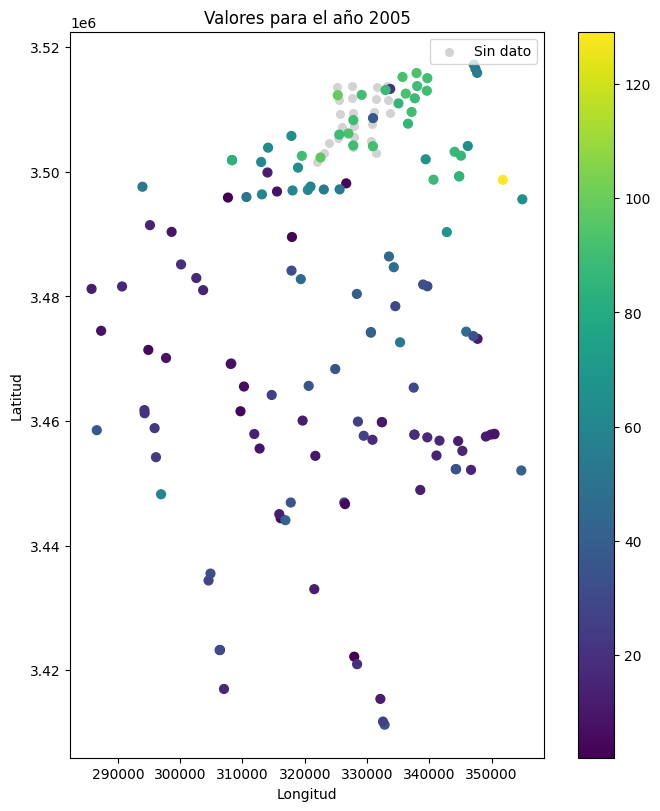

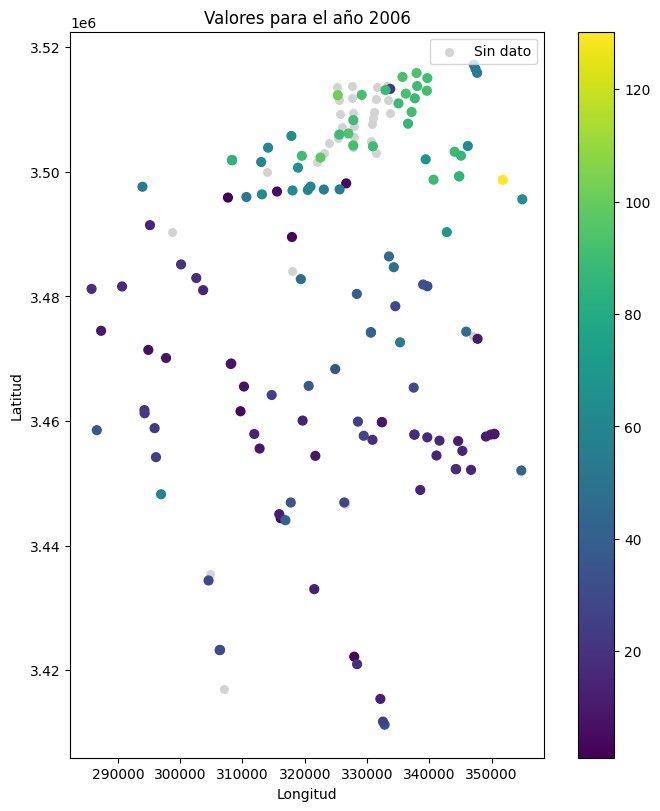

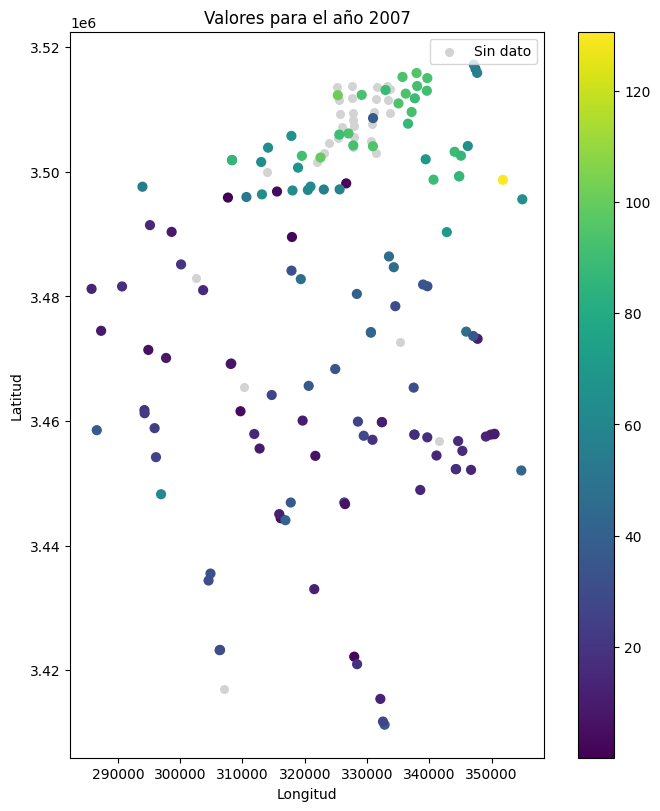

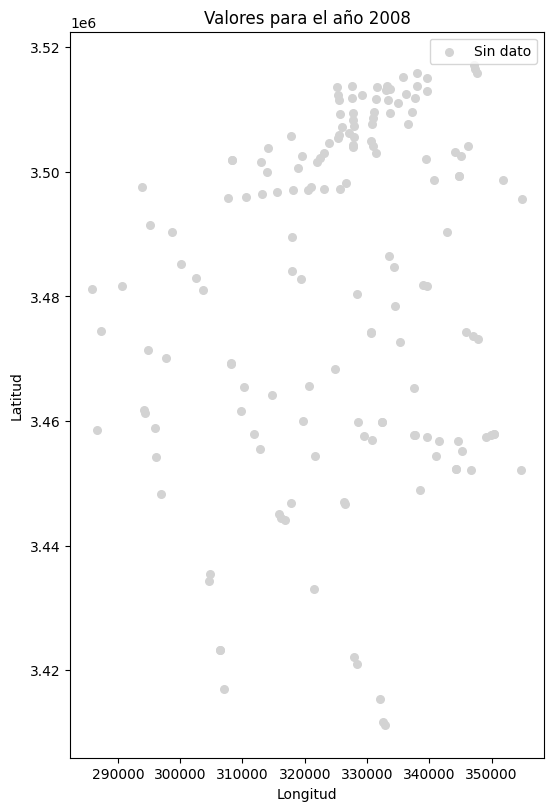

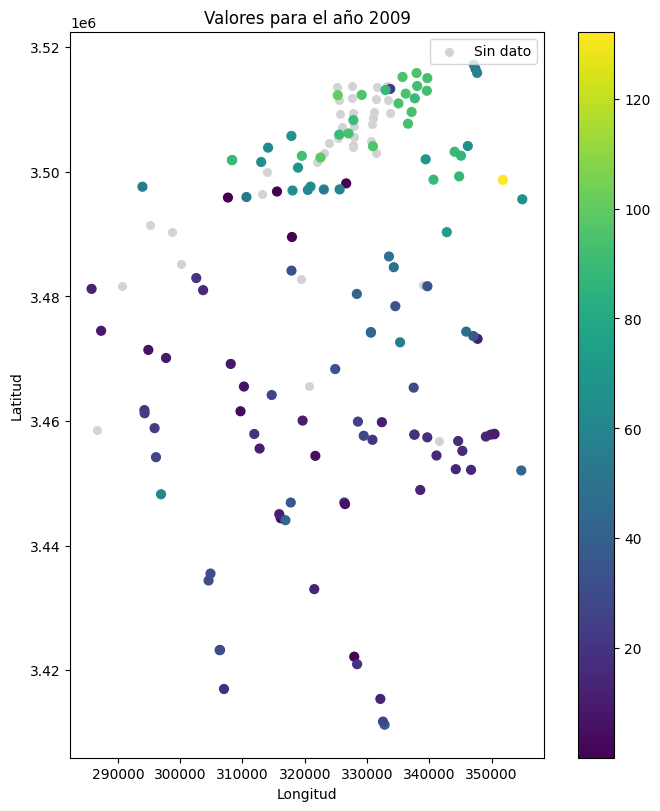

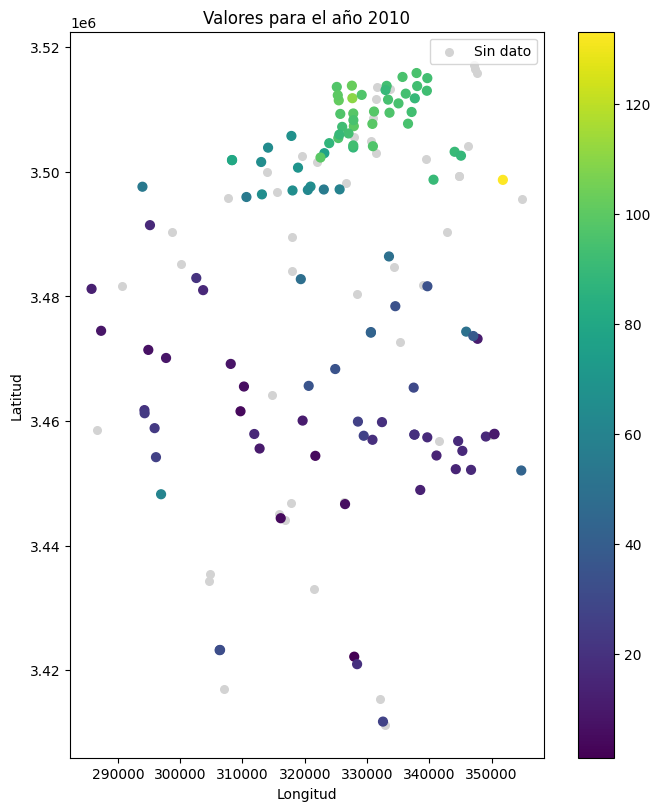

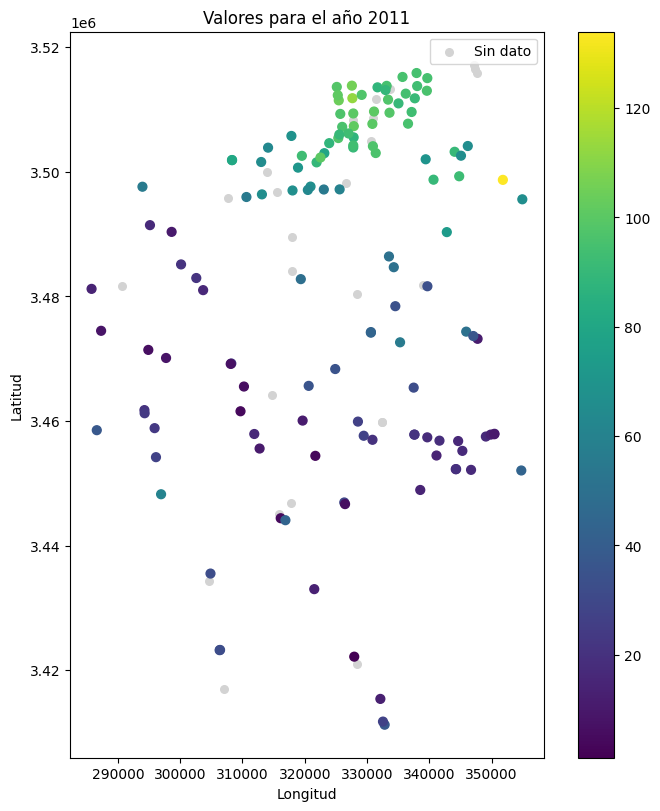

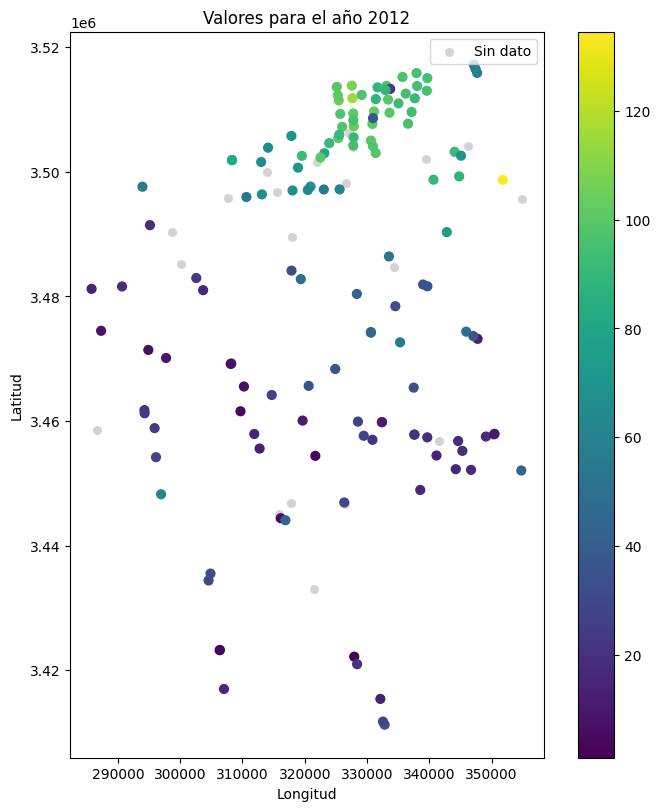

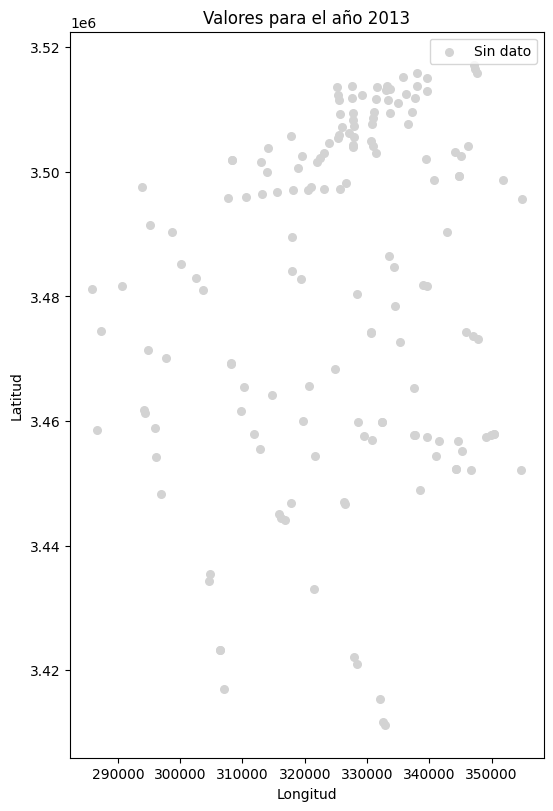

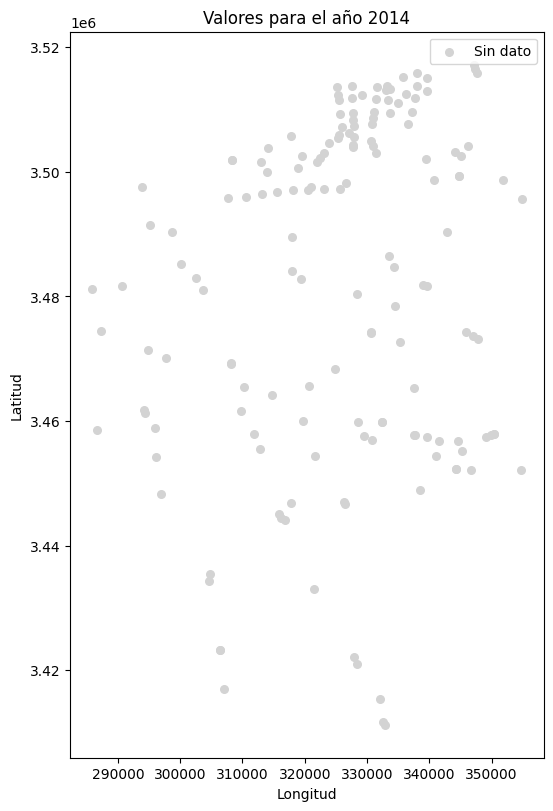

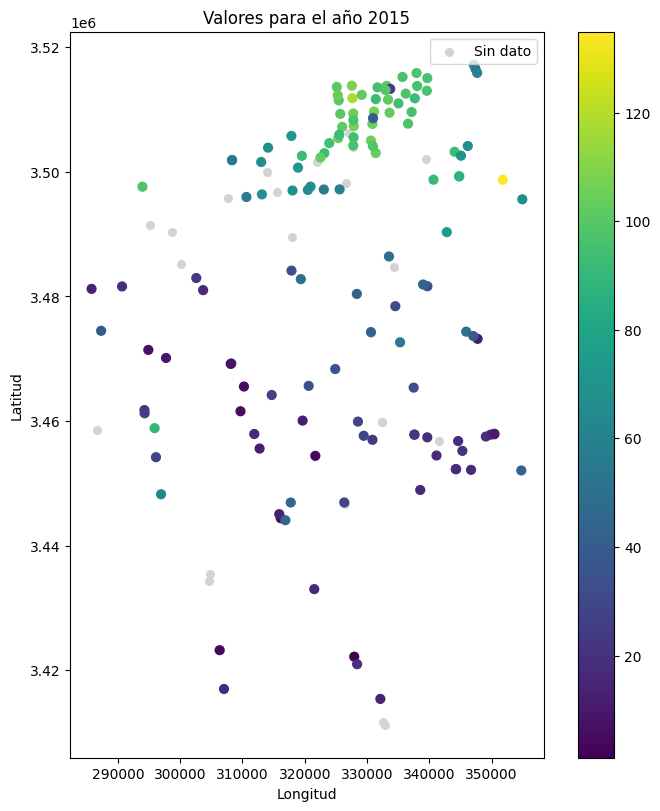

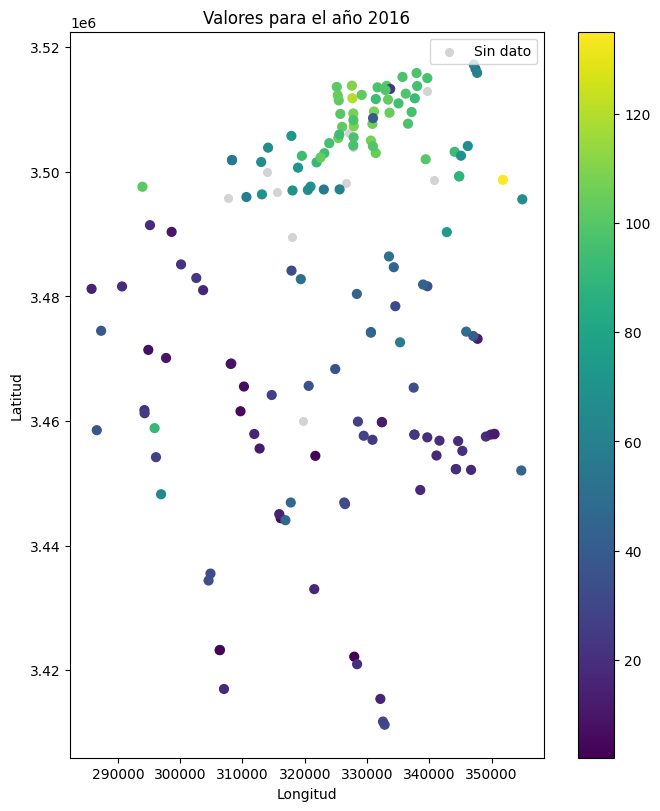

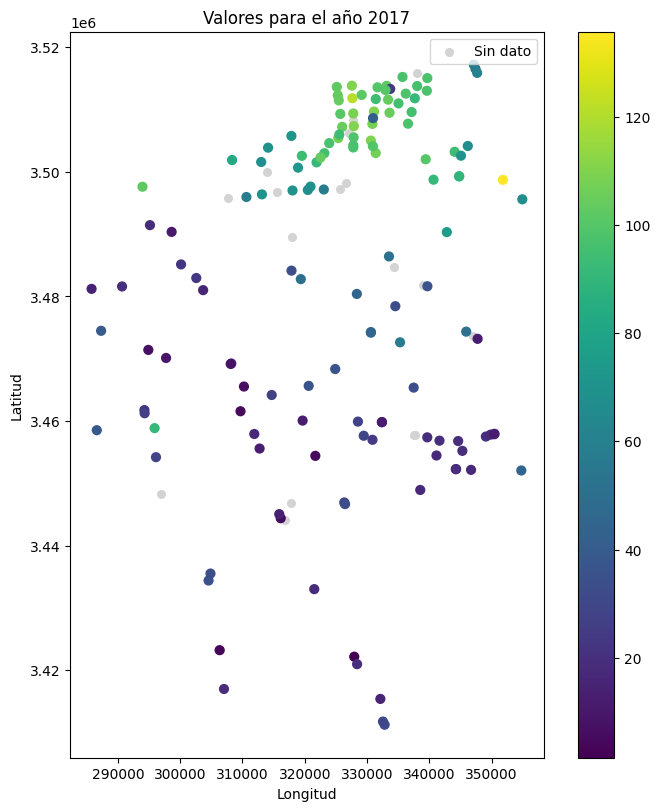

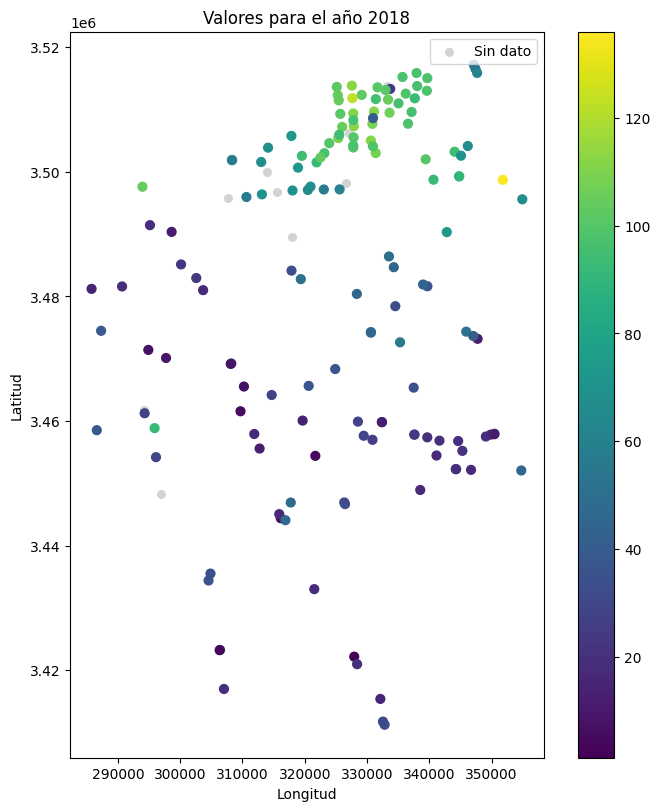

In [15]:
for anio in anios:
    col = str(anio)
    if col not in gdf.columns:
        continue

    # Convertir a número (forzar errores como NaN)
    gdf[col] = pd.to_numeric(gdf[col], errors='coerce')

    fig, ax = plt.subplots(figsize=(8, 8), constrained_layout=True)

    # Dividir en puntos con dato y sin dato
    gdf_con_dato = gdf[gdf[col].notna() & gdf.geometry.notna()]
    gdf_sin_dato = gdf[gdf[col].isna() & gdf.geometry.notna()]

    # Puntos sin dato (gris)
    if not gdf_sin_dato.empty:
        gdf_sin_dato.plot(
            ax=ax,
            color='lightgrey',
            markersize=30,
            label='Sin dato'
        )

    # Puntos con dato (rampa de color)
    if not gdf_con_dato.empty:
        gdf_con_dato.plot(
            ax=ax,
            column=col,
            cmap='viridis',
            legend=True,
            markersize=40
        )

    ax.set_title(f'Valores para el año {anio}')
    ax.set_xlabel('Longitud')
    ax.set_ylabel('Latitud')
    ax.legend()
    plt.show()
